___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, XGBoost,and Neural Network*** algorithms and ***Unbalanced Data Techniques*** . Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***other libraries*** in a variety of ways.

Data drift and model drirft are key consepts about ML and MLOPS, you can monitor and check your data and models with plenty of ways and tools. ***Deepchecks*** is one of them and the leading tool for testing and for validating your machine learning models and data, and it enables doing so with minimal effort. In this project, you will apply ***Data Integrity, Train-Test Validation, and Model Evaluation*** checks.
Deepchecks Introduction : https://youtu.be/7ELdizoi6BU

At the end of the project, you will have the opportunity to deploy your model by ***Streamlit API***.

Before diving into the project, please take a look at the Determines and Tasks.

---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset.

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning.

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can display the distribution of the target variable's classes over other variables.
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with.

Start with Logistic Regression and evaluate model performance. You will apply the Unbalanced Data Techniques used to increase the performance. Next, observe their effects.

Then, you will use four different algorithms in the model building phase.

In the final step, you will deploy your model using ***Streamlit API***.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Apply data integrity checks
- Exploratory Data Analysis
- Data Cleaning
    
#### 2. Data Preprocessing

- Train - Test Split
- Train - Test Split Validation Checks
- Scaling

#### 3. Model Building

- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier
- Neural Network
-

#### 4. Model Deployement

- Save and Export the Best Model
- Save and Export Variables




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Husam = '/content/drive/MyDrive/Colab Notebooks/Datasets/creditcard.csv'
Afnan = '/content/drive/MyDrive/Capstone_Projects/Project_Three_Fraud_Detection/creditcard.csv'

In [4]:
df = pd.read_csv(Afnan)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df2 = df.copy()

## Apply Data Integrity Checks
* link: https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_data_integrity.html

In [7]:
!pip install deepchecks
!pip install numba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.7 MB/s eta 0:00:00
  Created wheel for PyNomaly: filename=PyNomaly-0.3.3-py3-none-any.whl size=8480 sha256=b5e509a9c598b21be634bd77759de660866ef3fa2bf39568ae7b4e29b27e862c
  Stored in directory: /root/.cache/pip/wheels/2b/49/68/62eb262833c0fd5403d3b258bd259b0f71516d2563a960303f
Successfully built PyNomaly
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastap

In [8]:
#  Data Integrity Checks

import sys
from deepchecks.tabular.suites import data_integrity
from deepchecks.tabular import Dataset
from deepchecks.tabular.checks import IsSingleValue, DataDuplicates

In [9]:
#ds = Dataset(dirty_df, cat_features= ['type'], datetime_name='Date', label= 'AveragePrice')
ds = Dataset(df)

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 1 categorical features were inferred.: Class


In [10]:
# Run Suite:
integ_suite = data_integrity()
suite_result = integ_suite.run(ds)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Data Integrity Suite

In [11]:
IsSingleValue().run(ds)

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Single Value in Column

### Exploratory Data Analysis

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Data Cleaning
Check Missing Values and Outliers

In [15]:
df.duplicated().sum()

1081

In [16]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.reset_index(drop=True, inplace=True)

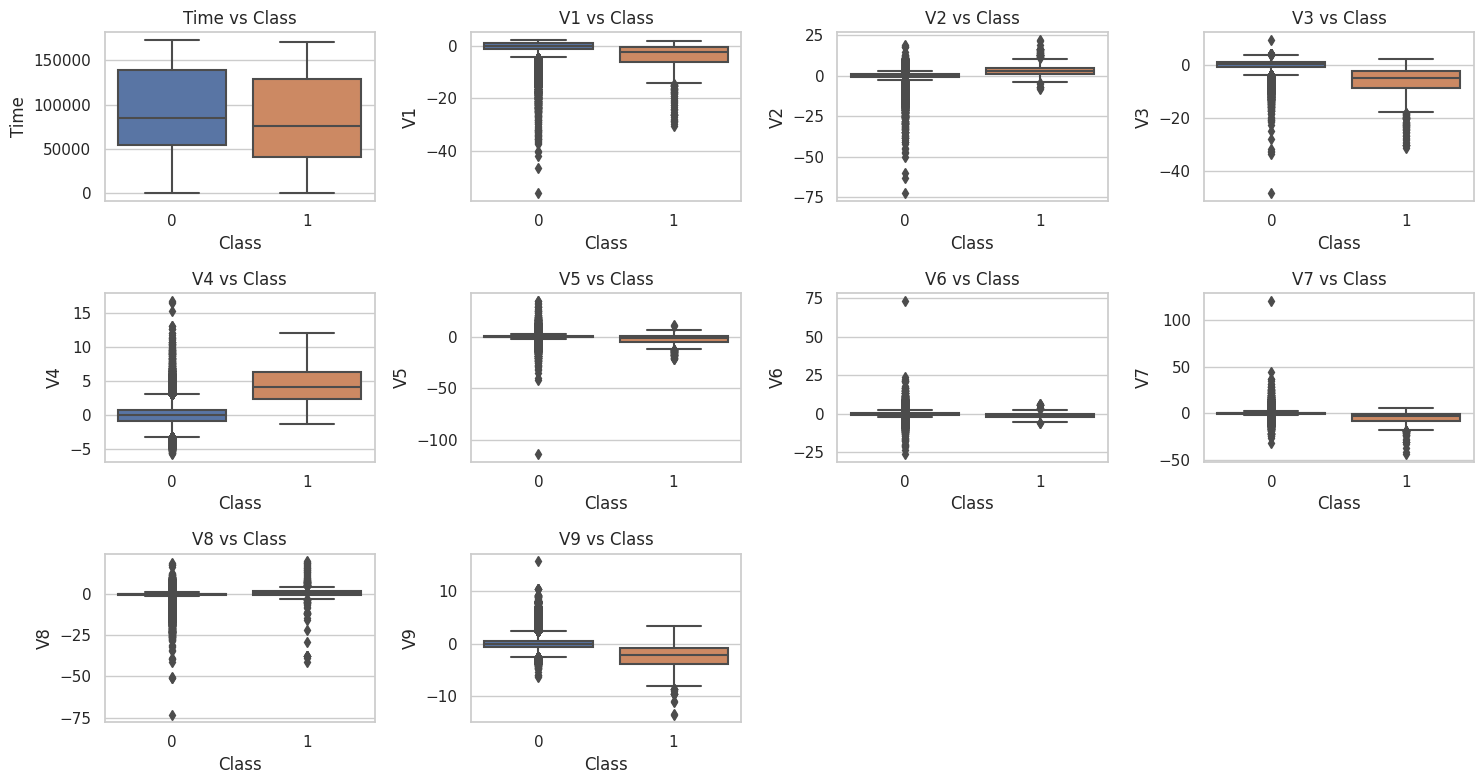

In [19]:
# Extract numerical features for box plots
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns[:10]

# Set a Seaborn style for the plot
sns.set(style="whitegrid")

# Create box plots for each numerical feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()

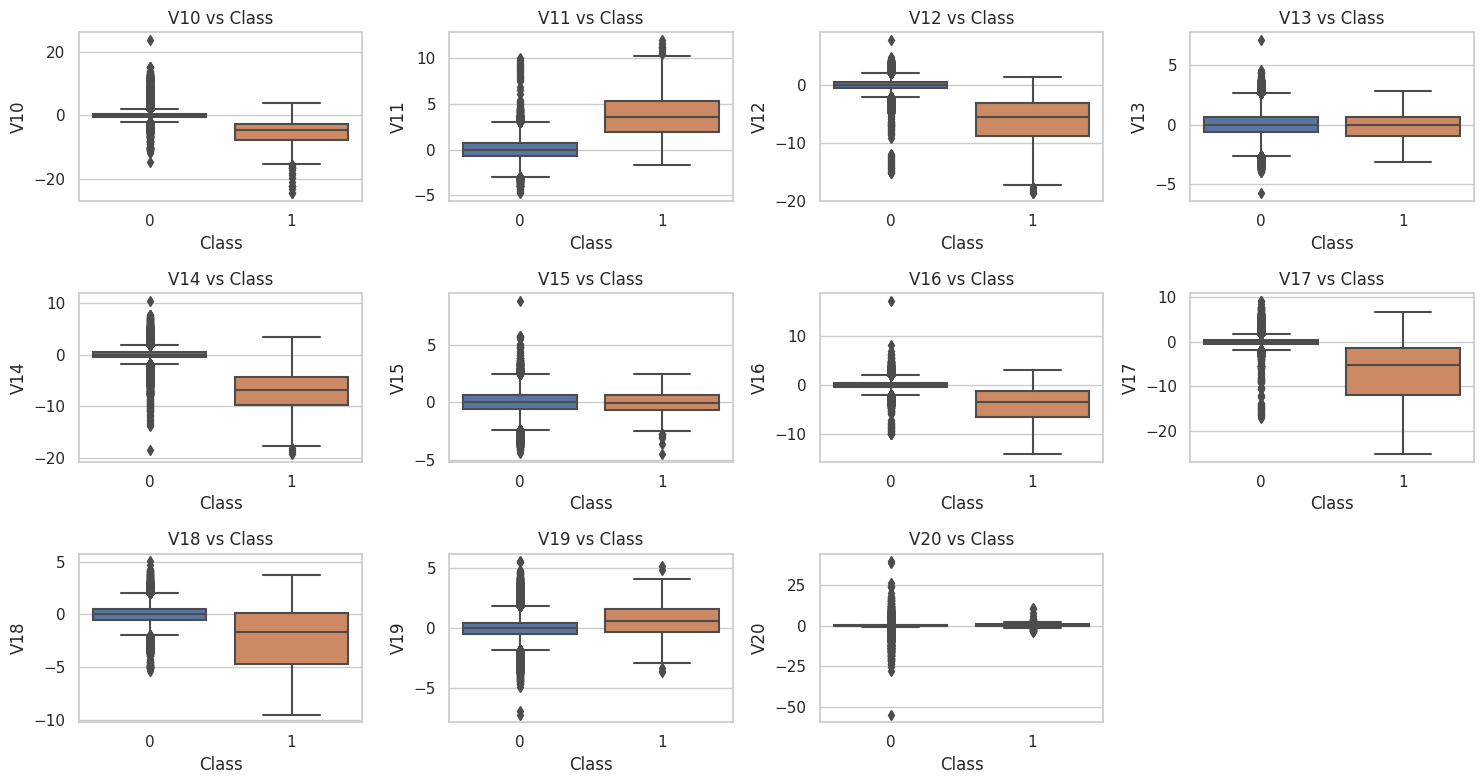

In [20]:
# Extract numerical features for box plots
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns[10:21]

# Set a Seaborn style for the plot
sns.set(style="whitegrid")

# Create box plots for each numerical feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()

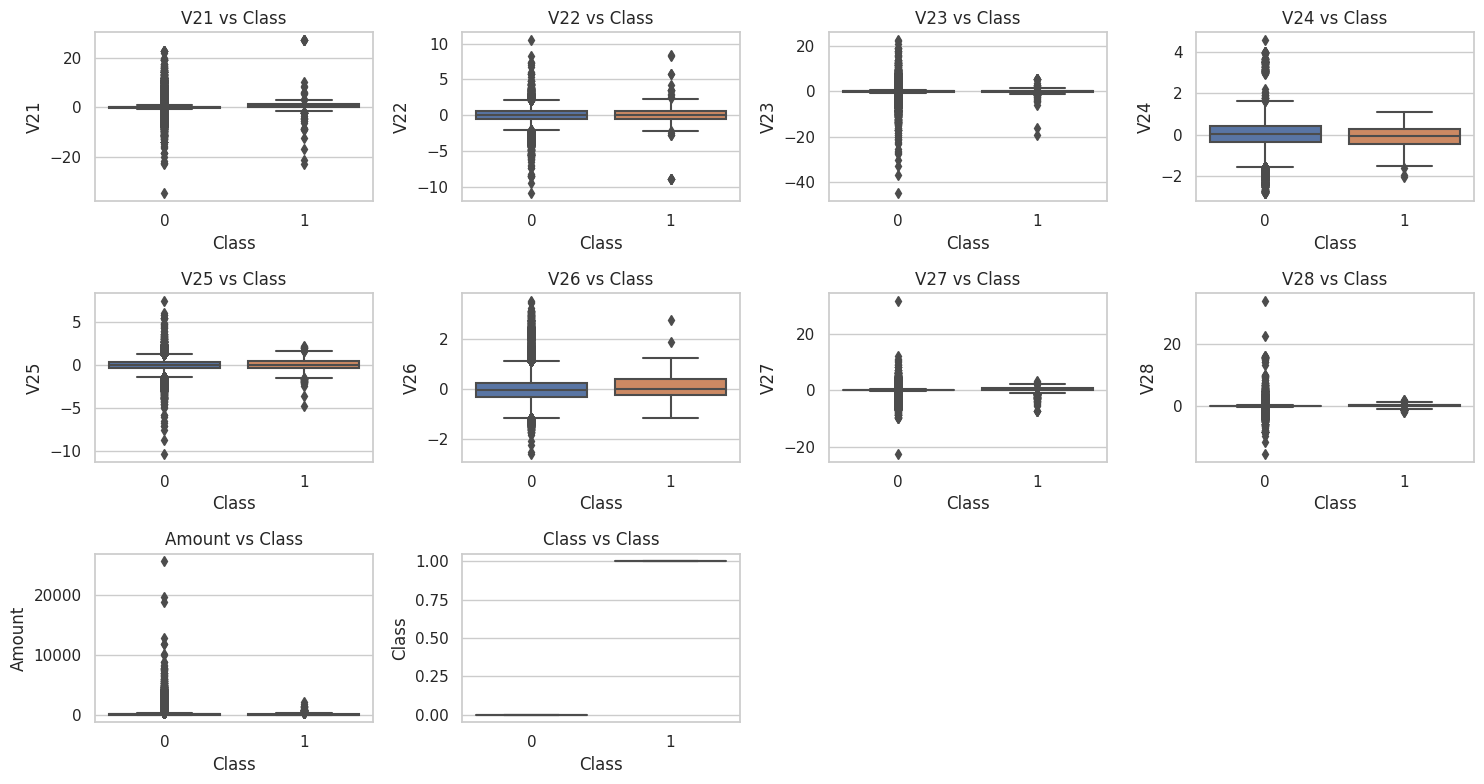

In [21]:
# Extract numerical features for box plots
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns[21:31]

# Set a Seaborn style for the plot
sns.set(style="whitegrid")

# Create box plots for each numerical feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize = (20, 20))
column=["V7","V8", 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
for i in range(0,3):
    plt.subplot(22, 1, i+1)
    sns.histplot(df[column[i]], color="#4288c2")    #histplot,distplot
    plt.tight_layout()

In [25]:
from collections import Counter

def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]

    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])

    return multiple_outliers


feature_list = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In [26]:
# detecting outliers
Outliers_IQR = IQR_method(df,1,feature_list)


# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of outliers is: 31904


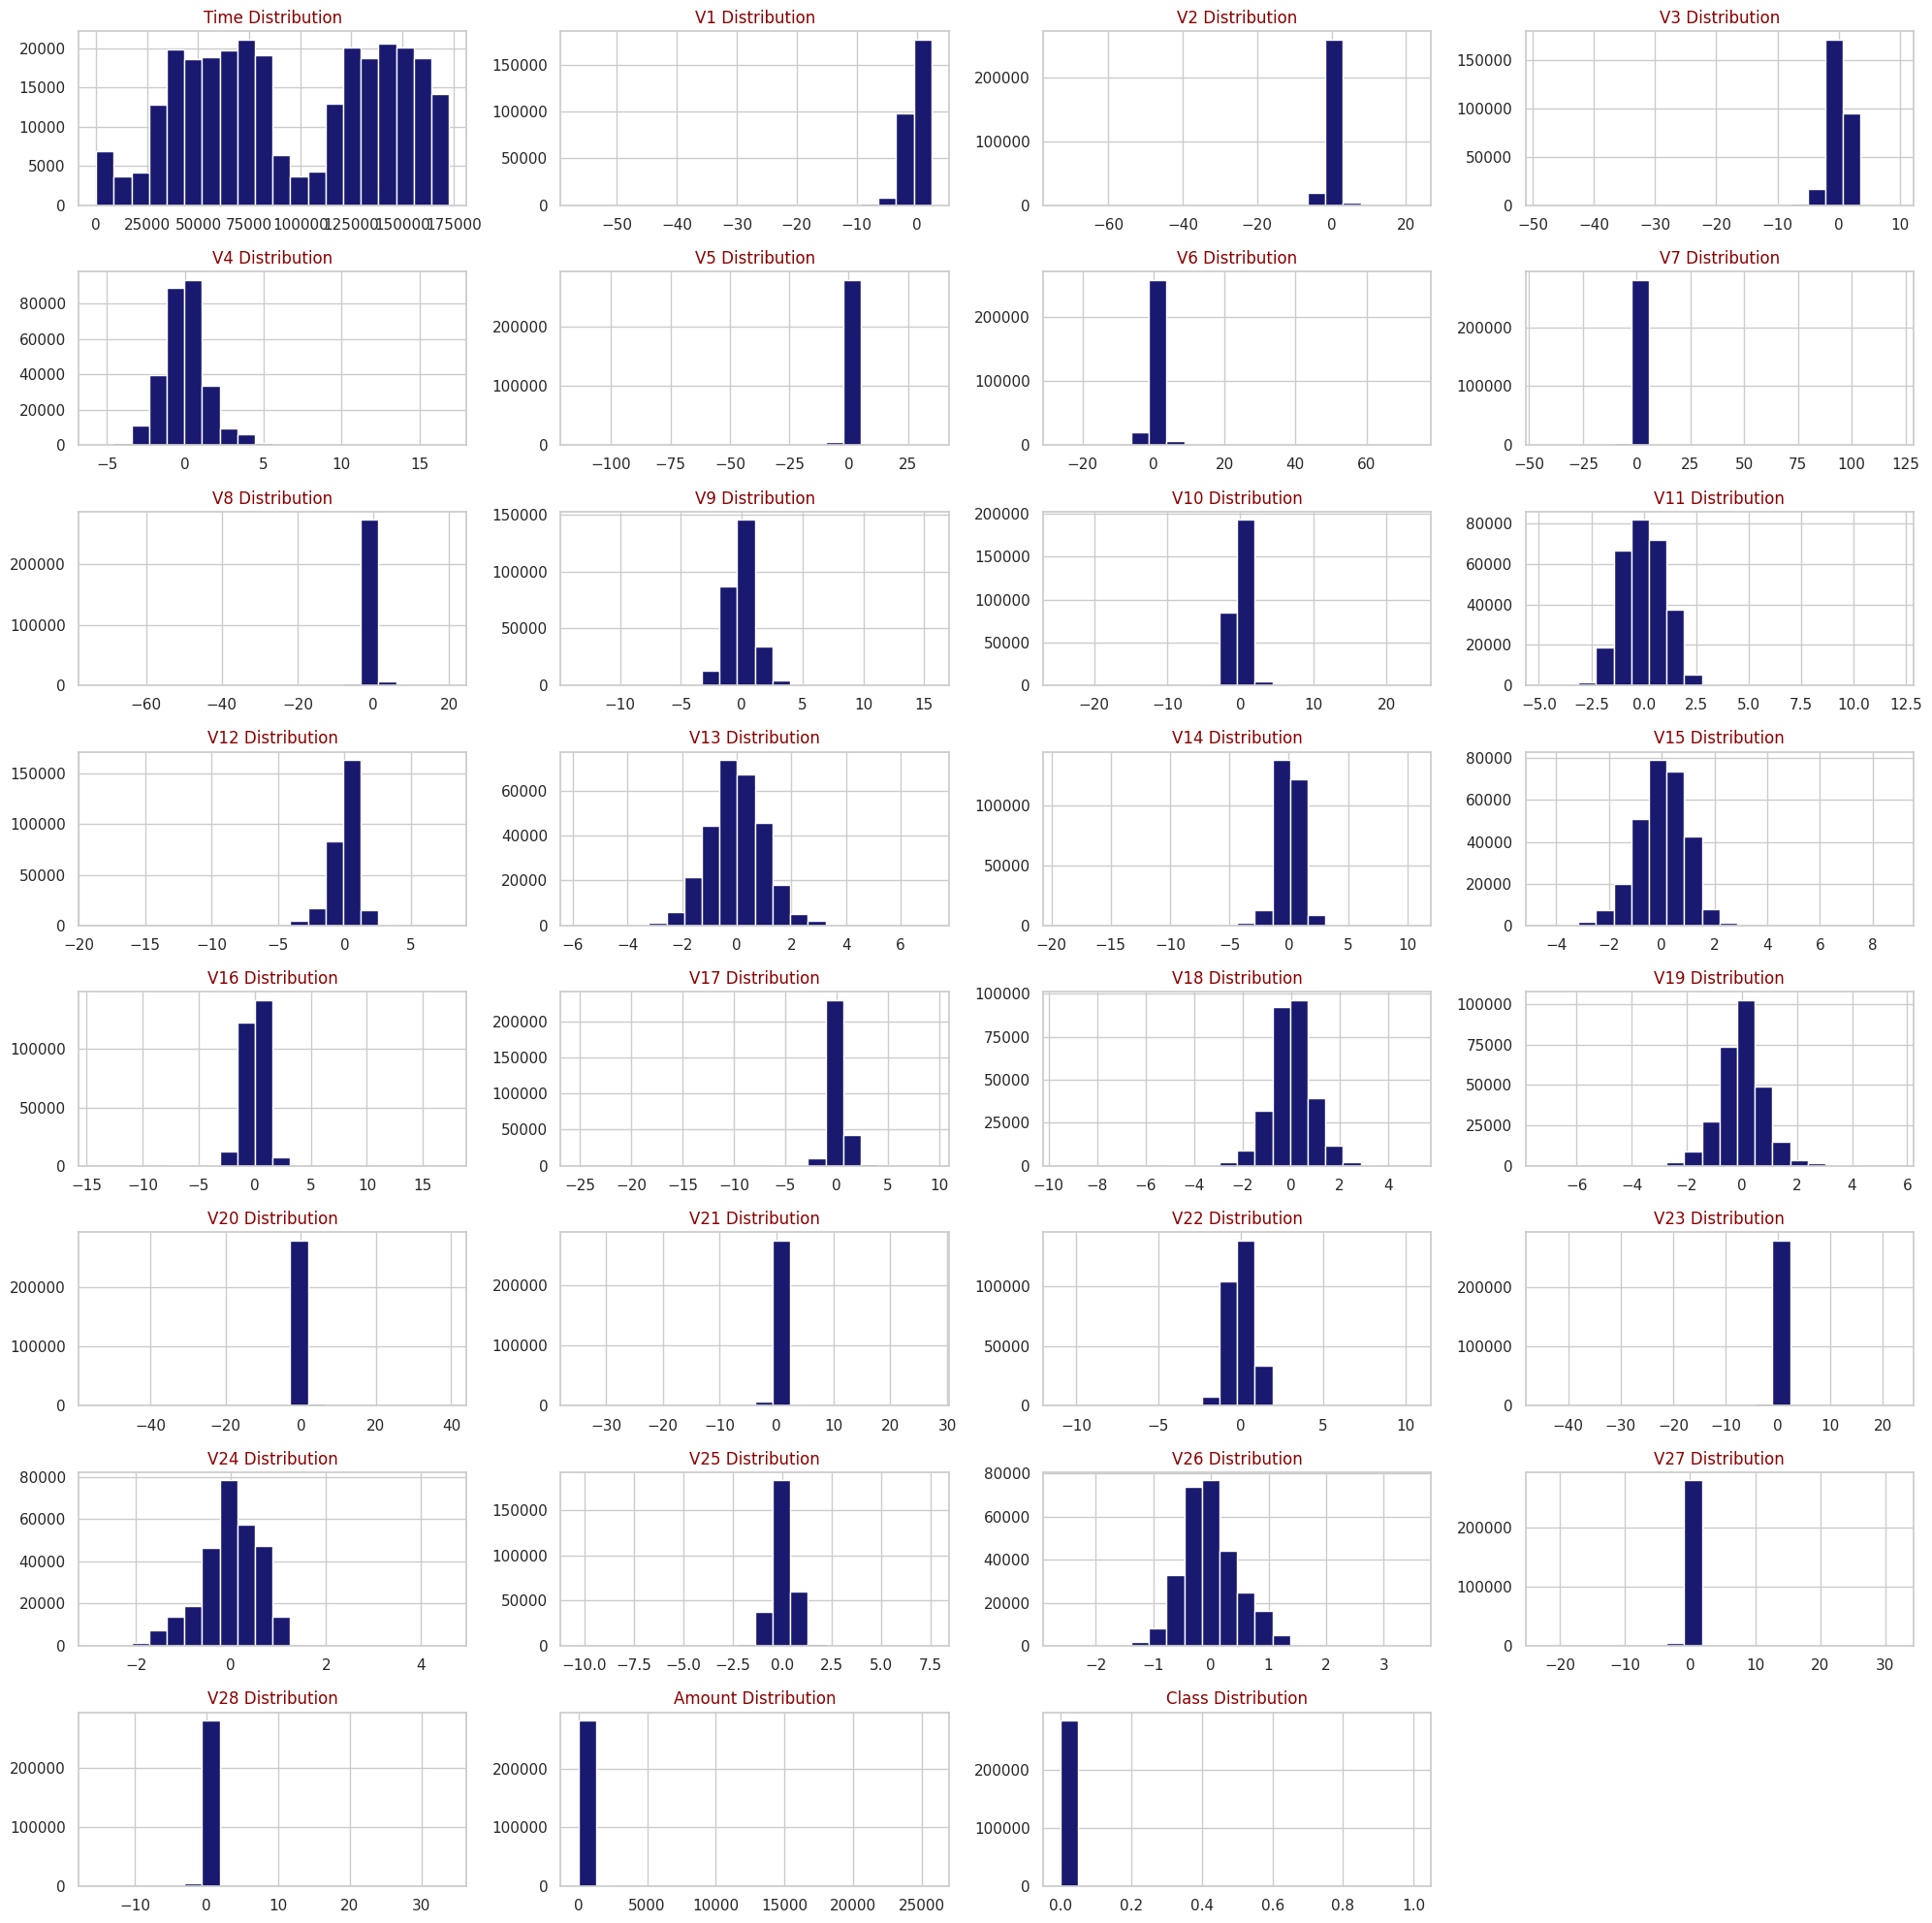

In [36]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
    fig.tight_layout()
    plt.show()
draw_histograms(df,df.columns,8,4)

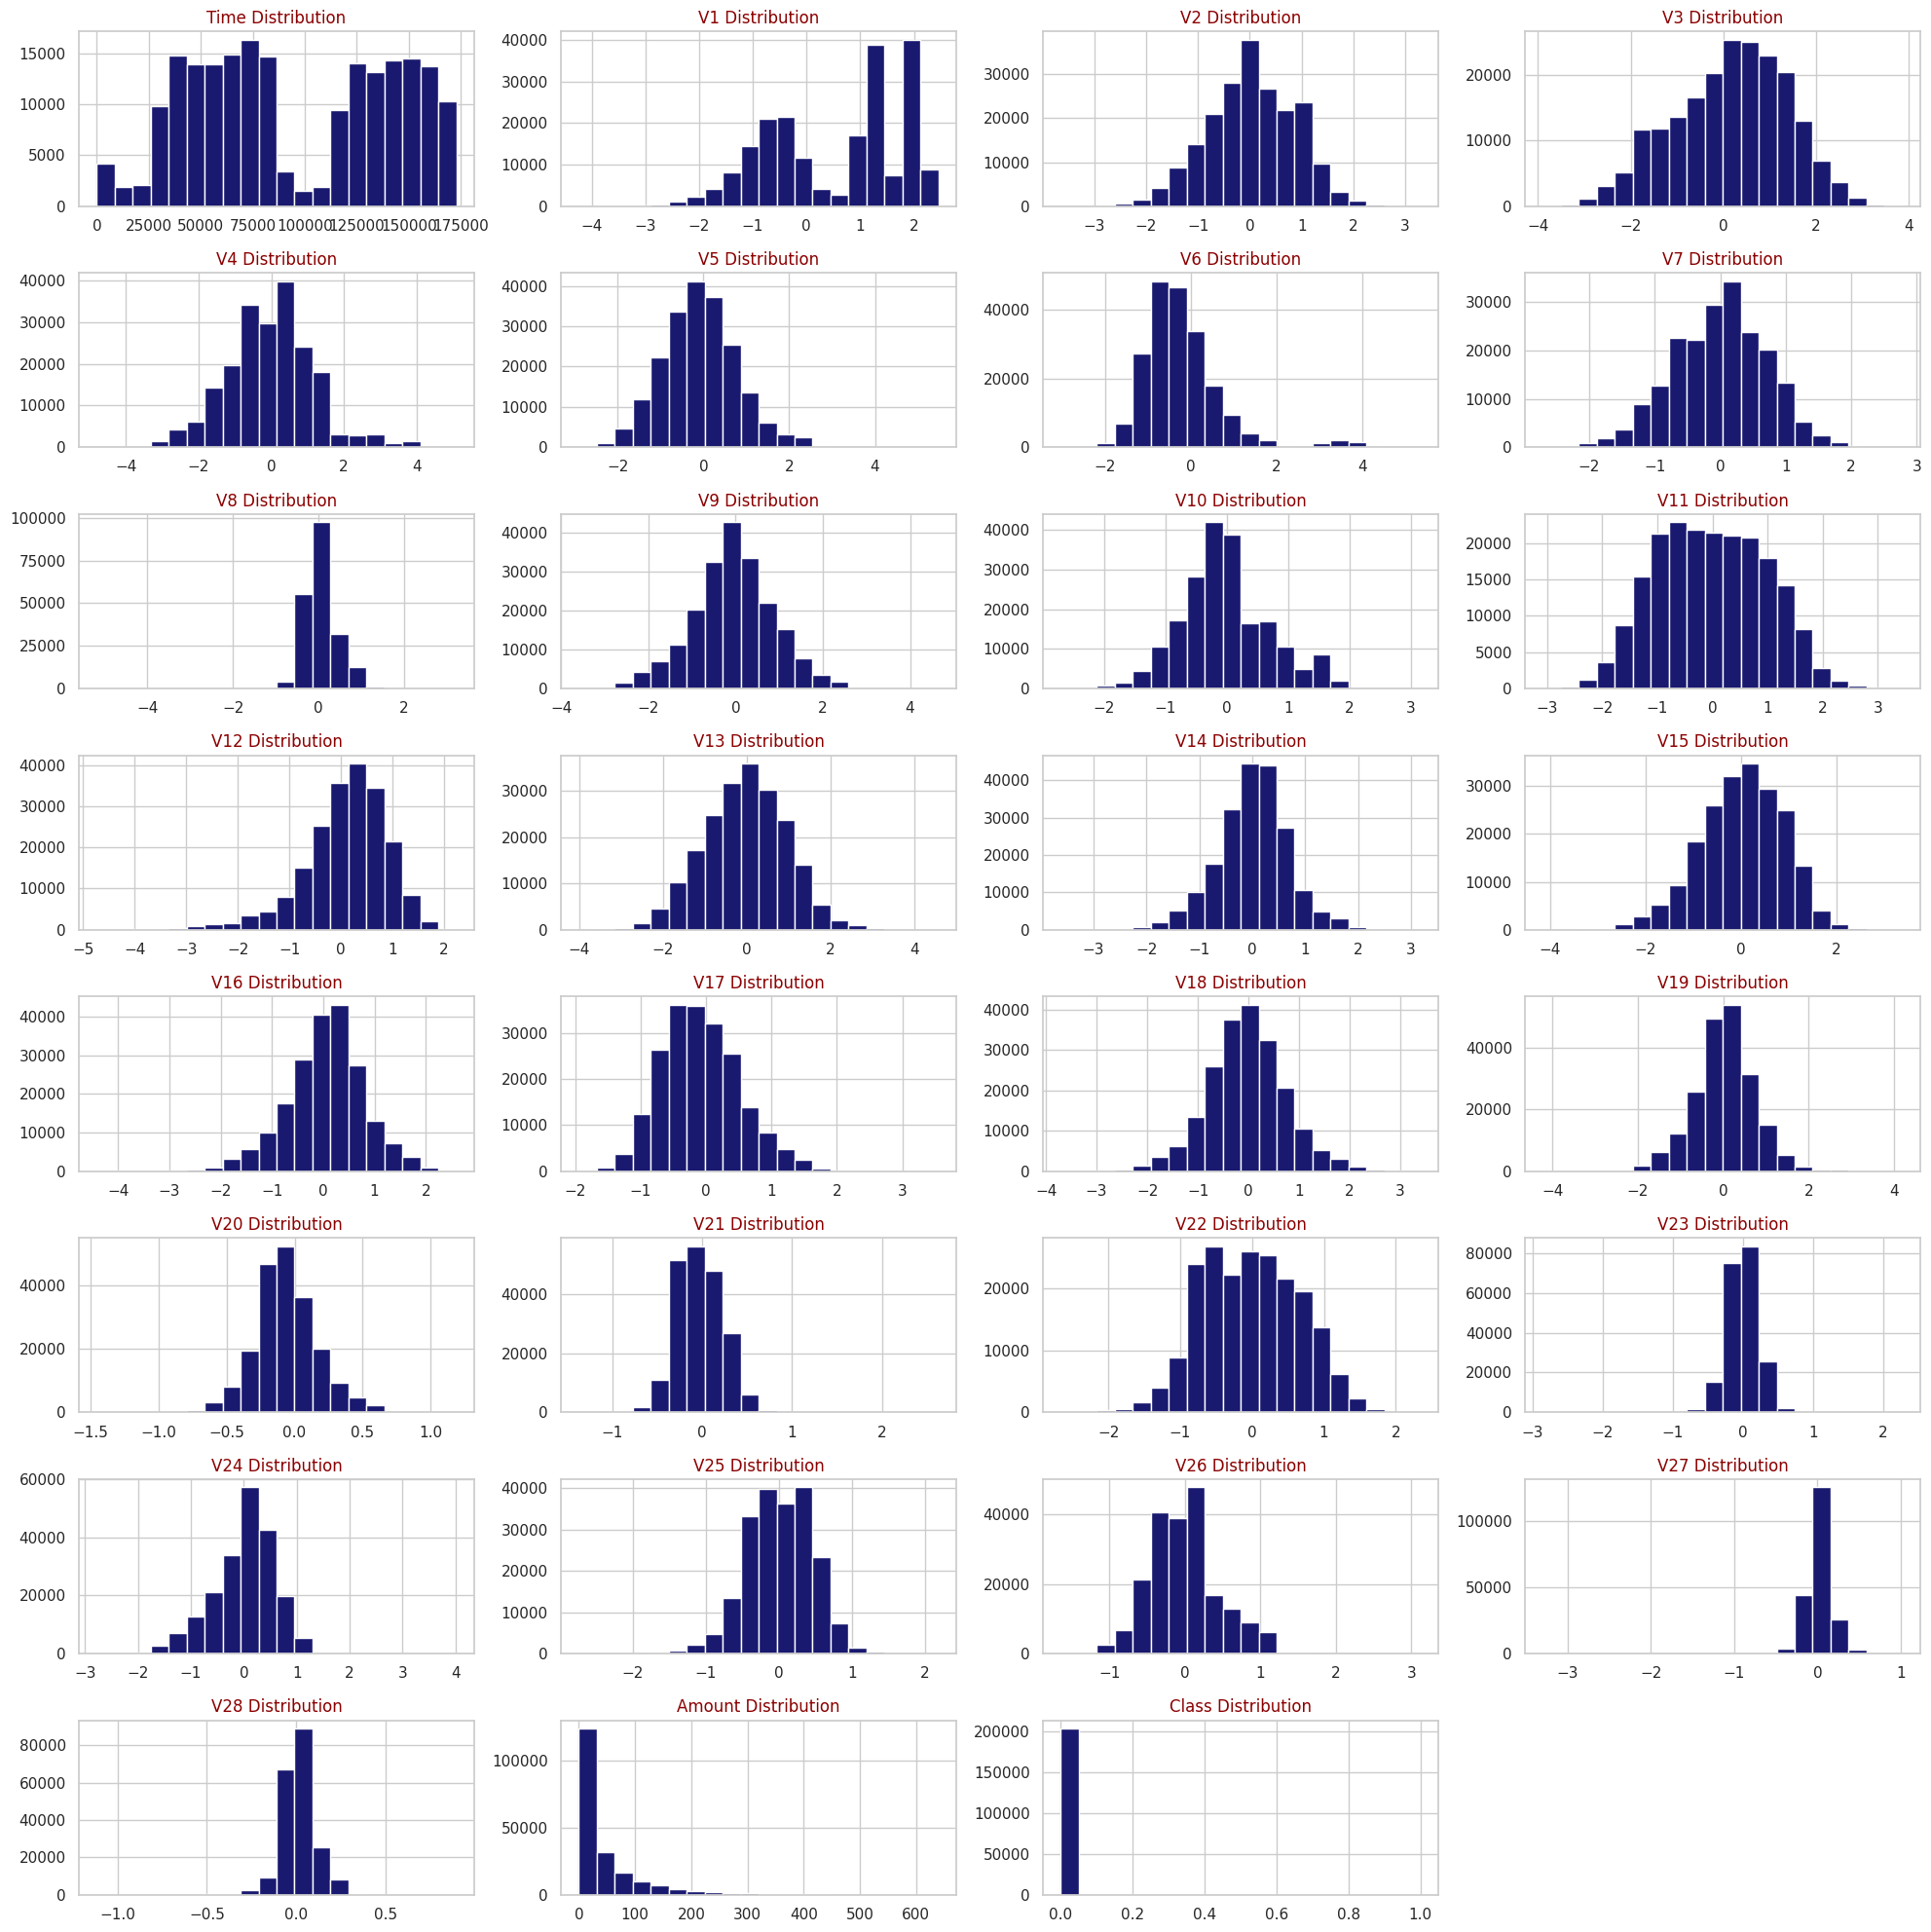

In [37]:
draw_histograms(df_out, df_out.columns,8,4)

In [29]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [30]:
df_out.Class.value_counts()

0    203351
1        26
Name: Class, dtype: int64

<Axes: >

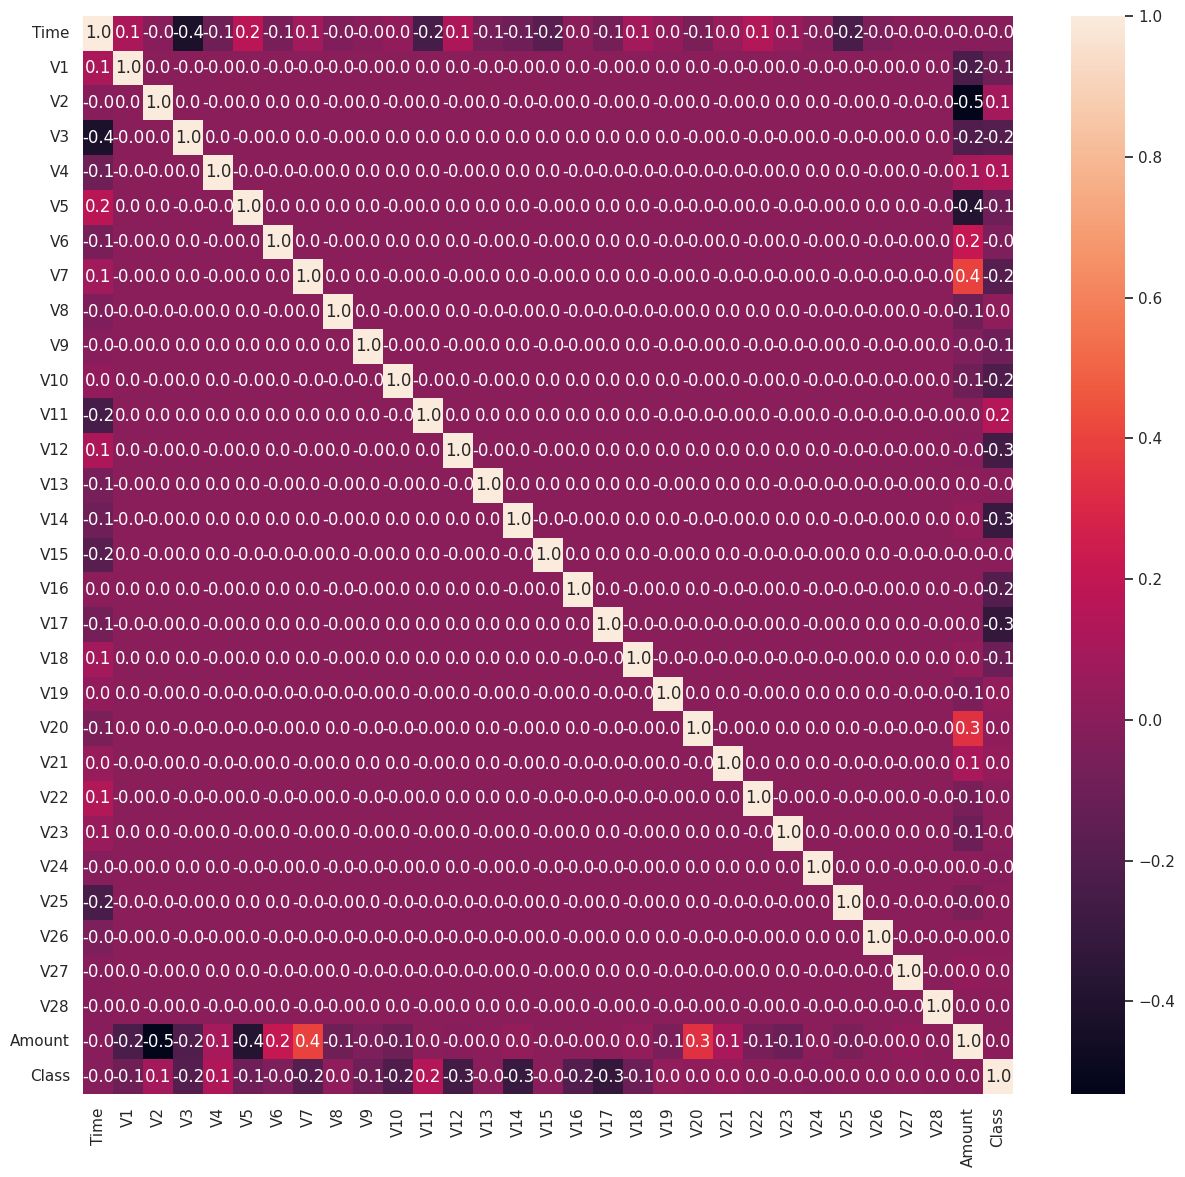

In [31]:
plt.figure(figsize=(15, 14))
sns.heatmap(df.corr(), annot=True, fmt=".1f")

Feature Importance Using LogisticRegression

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression

X = df2.drop('Class', axis=1)
y = df2['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [ ]:
importances

,Attribute,Importance
4,V4,0.929651
22,V22,0.526265
21,V21,0.291189
1,V1,0.259531
29,Amount,0.239078
5,V5,0.189752
19,V19,0.055439
24,V24,0.054032
12,V12,0.041335
26,V26,0.006517


from matplotlib import pyplot as plt
importances['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
importances['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=5,
                             random_state=42,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
clf.fit(X_train_scaled, y_train)
preds = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


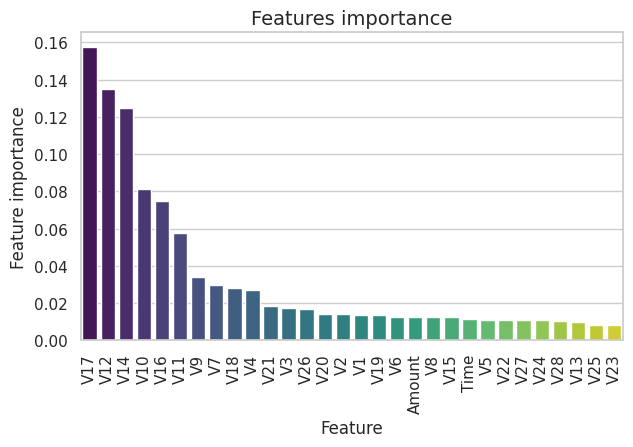

In [ ]:
### Feature Importance

tmp = pd.DataFrame({'Feature': X.columns, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp,palette = 'viridis')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
df2.shape

(284807, 31)

Chocises we have:
1- Under samping the 0 class
2- Oversampling the 1 class
3- Undersampling the 1 class and oversampling the 0 class

Conclusion: The data has outliers, and we can limit the threshold to remove the outliers (-10 to 10)

In [32]:
df_sample = df.sample(frac =.5, random_state = np.random.permutation(len(df)))

In [33]:
df_sample.shape

(142404, 31)

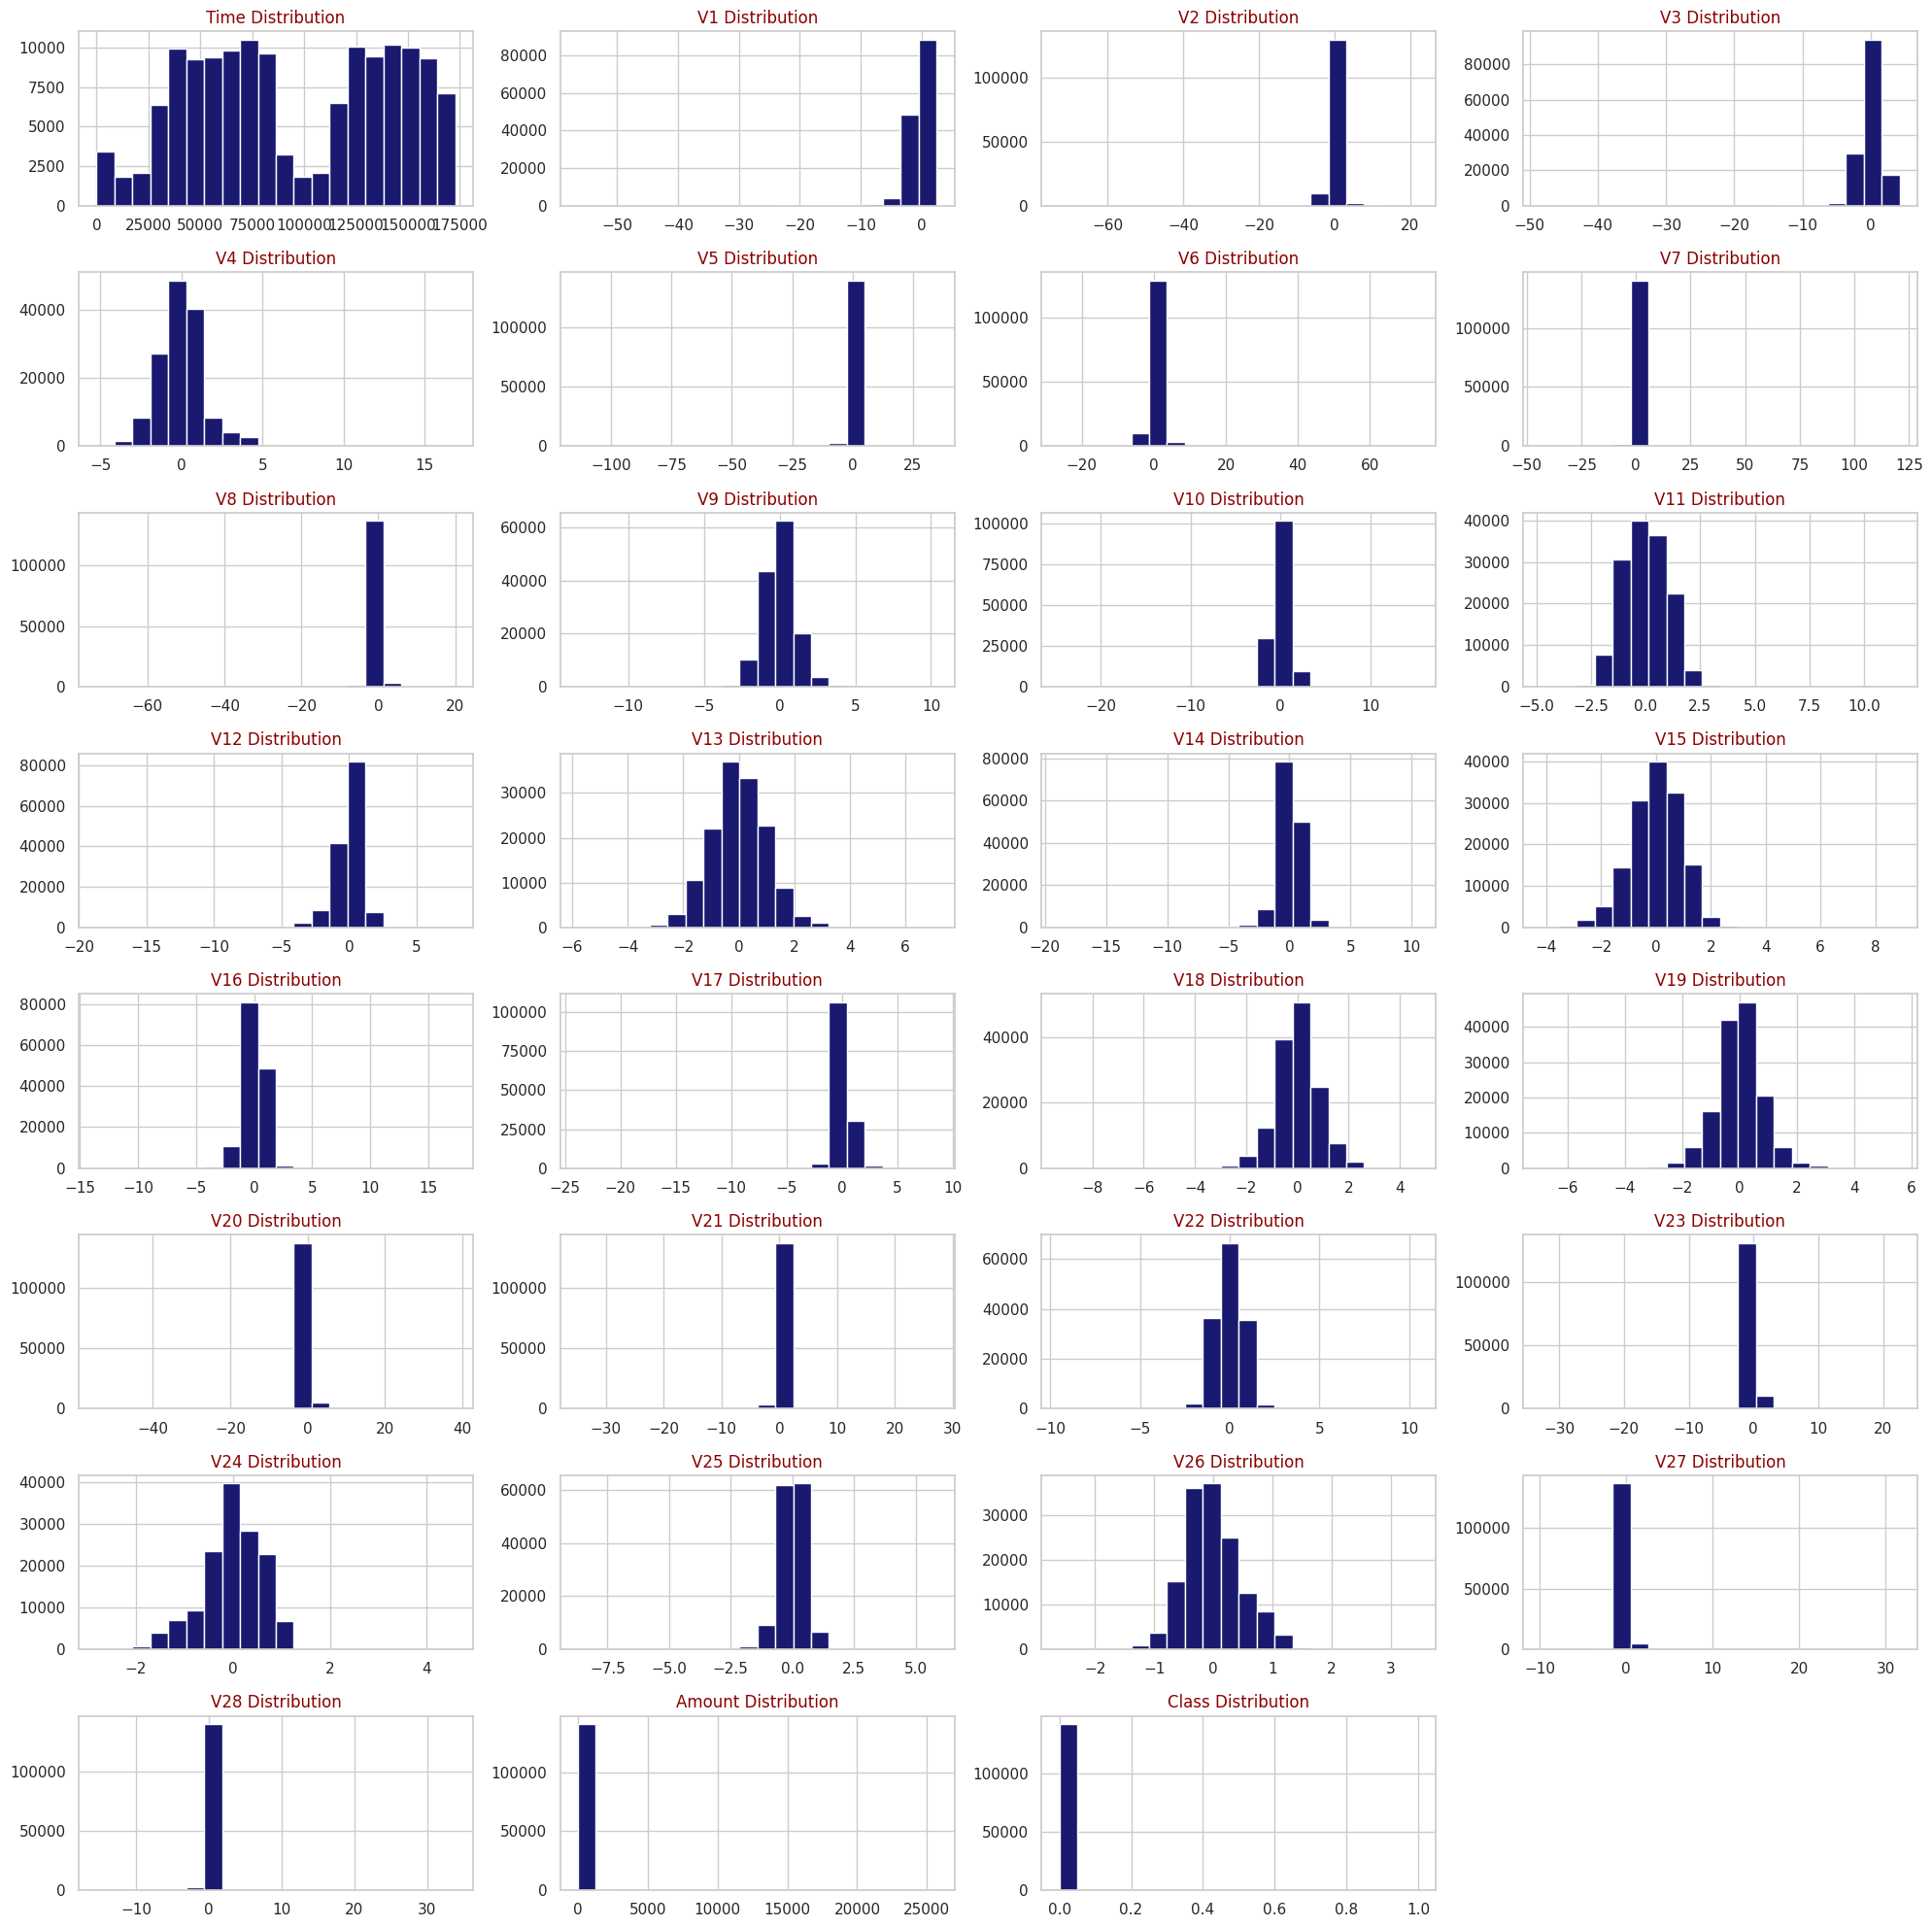

In [38]:
draw_histograms(df_sample, df_sample.columns,8,4)

---
---


## 2. Data Preprocessing

#### Train - Test Split

In [39]:
from sklearn.model_selection import train_test_split

In [52]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Train-Test Validation Checks
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_train_test_validation.html

In [ ]:
import deepchecks
from deepchecks import Dataset, Model

In [ ]:
dataset = Dataset.from_pandas(df)

In [ ]:
train_set, val_set, test_set = dataset.split(train=0.7, val=0.2, test=0.1)

In [ ]:
# Define your model architecture and compile it
model = ...

# Train your model on the training set
model.fit(train_set.X, train_set.y, ...)

In [ ]:
val_loss, val_acc = model.evaluate(val_set.X, val_set.y)

In [ ]:
# Load the trained model
model = Model.load("path/to/your/trained_model.h5")

# Create a DeepChecks Model object
deepchecks_model = Model(model)

# Validate your model on the testing set
results = deepchecks_model.validate(test_set.X, test_set.y)

# Print the results
print(results)

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with four different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset, we can use undersampling and oversampling or class weight and optimum thresold techniques.

### Logistic Regression

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating and Tuning*
   
   *iv. Plot Precision and Recall Curve*

***i. Import Libraries***

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

***ii. Model Training***

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lr = LogisticRegression(max_iter = 1000)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [56]:
eval_metric(lr, X_train, y_train, X_test, y_test)

Test_Set
[[56849    15]
 [   31    67]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.68      0.74        98

    accuracy                           1.00     56962
   macro avg       0.91      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227411     40]
 [   149    245]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.86      0.62      0.72       394

    accuracy                           1.00    227845
   macro avg       0.93      0.81      0.86    227845
weighted avg       1.00      1.00      1.00    227845



## LR Cross Validation

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)

f1_fraud = make_scorer(f1_score, average=None, labels=[1])
precision_fraud = make_scorer(precision_score, average=None, labels=[1])
recall_fraud = make_scorer(recall_score, average=None, labels=[1])


scoring = {
    "f1_fraud": f1_fraud,
    "precision_fraud": precision_fraud,
    "recall_fraud": recall_fraud,
}

In [58]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_validate(
    lr,
    X_train,
    y_train,
    scoring=scoring,
    cv=10,
    return_train_score=True,
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()

fit_time                 13.171287
score_time                0.079036
test_f1_fraud             0.720073
train_f1_fraud            0.722544
test_precision_fraud      0.843780
train_precision_fraud     0.834378
test_recall_fraud         0.634295
train_recall_fraud        0.639027
dtype: float64

***iii. Prediction and Model Evaluating  and Tuning***

In [140]:
from sklearn.experimental import enable_halving_search_cv

In [ ]:
from sklearn.model_selection import HalvingGridSearchCV

operations = [("logistic", lr)]

pipe_model = Pipeline(steps=operations)

param_grid = {
    "logistic__C": [0.001, 0.01],  # 100, 1000
    #"logistic__penalty": ["l1", "l2"],
    #"logistic__class_weight": ["balanced"],
    "logistic__solver": ["saga"],
    "logistic__max_iter" : [20000],
}

# Create the HalvingGridSearchCV object
halving_search = HalvingGridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_fraud)

# Fit the model to the data
halving_search.fit(X_train, y_train)

In [63]:
halving_search.best_estimator_

Pipeline(steps=[('logistic',
                 LogisticRegression(C=0.001, class_weight='balanced',
                                    max_iter=1000))])

In [64]:
pd.DataFrame(halving_search.cv_results_).loc[
    halving_search.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.906005
mean_train_score    0.919413
Name: 0, dtype: object

In [65]:
eval_metric(halving_search, X_train, y_train, X_test, y_test)

Test_Set
[[54738  2126]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962


Train_Set
[[219066   8385]
 [    34    360]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    227451
           1       0.04      0.91      0.08       394

    accuracy                           0.96    227845
   macro avg       0.52      0.94      0.53    227845
weighted avg       1.00      0.96      0.98    227845




You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [67]:
pip install scikit-plot

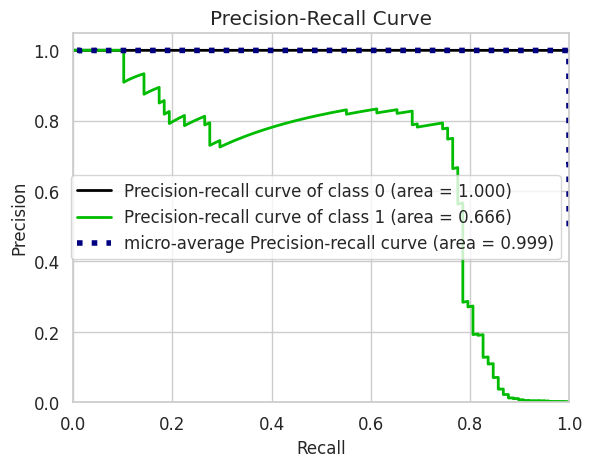

In [68]:
from scikitplot.metrics import plot_precision_recall, plot_roc, precision_recall_curve

y_pred_proba = pipe_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class matrics is not sufficient, apply "unbalanced data tecniques".

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [72]:
from deepchecks.tabular import Dataset

# Categorical features can be heuristically inferred, however we
# recommend to state them explicitly to avoid misclassification.

# Metadata attributes are optional. Some checks will run only if specific attributes are declared.

train_ds = Dataset(X_train, label=y_train)
test_ds = Dataset(X_test, label=y_test)

deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 0 categorical features were inferred.


In [74]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, pipe_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

deepchecks - WARNING - Cannot use model's built-in feature importance on a Scikit-learn Pipeline, using permutation feature importance calculation instead
deepchecks - INFO - Calculating permutation feature importance. Expected to finish in 53 seconds
INFO:deepchecks:Calculating permutation feature importance. Expected to finish in 53 seconds


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

### Logistic Regression with Unbalanced Data Techniques

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

***i. Train-Test Split (Again)***

Over-sambilling the target column

In [87]:
from imblearn.over_sampling import RandomOverSampler

# Combine features and target in the training set
train_data = pd.concat([X_train, y_train], axis=1)
print("Class distribution before oversampling:")
print(train_data["Class"].value_counts())

# Oversample the minority class
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

print("\nClass distribution after oversampling:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution before oversampling:
0    227451
1       394
Name: Class, dtype: int64

Class distribution after oversampling:
0    227451
1    227451
Name: Class, dtype: int64


Under-sambilling the target column

In [113]:
from imblearn.under_sampling import RandomUnderSampler

# Custom undersampling
undersampler = RandomUnderSampler(sampling_strategy={0: 4000}, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [114]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [115]:
print(pd.Series(y_resampled).value_counts())

0    4000
1     394
Name: Class, dtype: int64


In [118]:
# Custom oversampling
oversampler = RandomOverSampler(sampling_strategy={1: 1000}, random_state=42)
X_resampled_o, y_resampled_o = oversampler.fit_resample(X_resampled, y_resampled)

In [119]:
print(pd.Series(y_resampled_o).value_counts())

0    4000
1    1000
Name: Class, dtype: int64


We must be sure that the ratio between the 0 and one are the same.

***ii. Model Training***

In [127]:
lr = LogisticRegression()

lr.fit(X_resampled_o, y_resampled_o)

LogisticRegression()

In [128]:
eval_metric(lr, X_resampled_o, y_resampled_o, X_test, y_test)

Test_Set
[[55955   909]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.91      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962


Train_Set
[[3944   56]
 [ 125  875]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4000
           1       0.94      0.88      0.91      1000

    accuracy                           0.96      5000
   macro avg       0.95      0.93      0.94      5000
weighted avg       0.96      0.96      0.96      5000



***Prediction and Model Evaluating and Tuning***

In [139]:
operations = [("logistic", lr)]

pipe_model = Pipeline(steps=operations)

param_grid = {
    "logistic__C": [0.001, 0.01],  # 100, 1000
    #"logistic__penalty": ["l1", "l2"],
    #"logistic__class_weight": ["balanced"],
    "logistic__solver": ["saga"],
    "logistic__max_iter" : [20000],
}

# Create the HalvingGridSearchCV object
halving_search = HalvingGridSearchCV(
    pipe_model, param_grid, cv=5, scoring=recall_fraud)

halving_search.fit(max_iter=20000, X_resampled_o, y_resampled_o)

SyntaxError: ignored

In [138]:
# Print the best parameters found
print("Best parameters found: ", halving_search.best_params_)

Best parameters found:  {'logistic__C': 0.01, 'logistic__solver': 'saga'}


In [ ]:
eval_metric(halving_search, X_train, y_train, X_test, y_test)

***iv.  Plot Precision and Recall Curve***


In [ ]:
y_pred_proba = pipe_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

In [75]:
from sklearn.ensemble import RandomForestClassifier


RF_model = RandomForestClassifier(random_state=101, max_depth=8)

RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=101)

In [86]:
eval_metric(RF_model, X_train, y_train, X_test, y_test)

Test_Set
[[56861     3]
 [   19    79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227451      0]
 [    77    317]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      0.80      0.89       394

    accuracy                           1.00    227845
   macro avg       1.00      0.90      0.95    227845
weighted avg       1.00      1.00      1.00    227845



In [77]:
from deepchecks.tabular.suites import model_evaluation

evaluation_suite = model_evaluation()
suite_result = evaluation_suite.run(train_ds, test_ds, RF_model)
# Note: the result can be saved as html using suite_result.save_as_html()
# or exported to json using suite_result.to_json()
suite_result.show()

<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Model Evaluation Suite

### Random Forest Classifier with Unbalanced Data Techniques
   

***i. Model Training***

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("scaler", sc),
              ("RF_model", RandomForestClassifier(random_state=101, max_depth=8))]  # max_depth=3

RF_model = Pipeline(steps=operations)

RF_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('RF_model',
                 RandomForestClassifier(max_depth=8, random_state=101))])

***ii. Prediction and Model Evaluating and Tuning***

In [ ]:
param_grid = {'RF_model__n_estimators':[50, 64, 128, 100],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__min_samples_split':[2, 3,4],
             'RF_model__min_samples_leaf': [2,3,4],
             'RF_model__max_samples':[0.8, 1]
             }

RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)

operations = [("scaler", sc),
              ("RF_model", RF_model)]

rg_model = Pipeline(steps=operations)

rf_grid_model = GridSearchCV(estimator=rg_model,
                             param_grid = param_grid,
                             scoring=recall_fraud,
                             n_jobs = -1,
                             verbose=2)

In [ ]:
rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


In [ ]:
rf_grid_model.best_estimator_

Pipeline(steps=[('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'WritingPreference',
                                                   'SubjectsBirthLocation'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        max_features=2, max_samples=0.8,
                                        min_samples_leaf=2, n_estimators=50,
                                        random_state=101))])

In [ ]:
rf_grid_model.best_score_

0.5904183535762483

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[89 30 12]
 [ 3 32 13]
 [44 65 86]]
              precision    recall  f1-score   support

       Black       0.65      0.68      0.67       131
    Hispanic       0.25      0.67      0.37        48
       White       0.77      0.44      0.56       195

    accuracy                           0.55       374
   macro avg       0.56      0.60      0.53       374
weighted avg       0.67      0.55      0.57       374


Train_Set
[[371 126  28]
 [ 28 123  40]
 [152 263 365]]
              precision    recall  f1-score   support

       Black       0.67      0.71      0.69       525
    Hispanic       0.24      0.64      0.35       191
       White       0.84      0.47      0.60       780

    accuracy                           0.57      1496
   macro avg       0.59      0.61      0.55      1496
weighted avg       0.71      0.57      0.60      1496



***iii. Plot Precision and Recall Curve***


In [ ]:
y_pred_proba = RF_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

Feature Selection

In [ ]:
feature_importances = RF_model.feature_importances_

feature_names = X_train_robust.columns  # Sort features based on importance

sorted_feature_importance = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)
# Extract feature names and their importance scores
features, importance = zip(*sorted_feature_importance)
# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(features[:10], importance[:10], color='teal')
plt.title('Random Forest - Top 10 Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

### XGBoost Classifier with Unbalanced Data Techniques

***i. Model Training***

In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(scale_pos_weight=100)

# Create a pipeline
pipe_model = Pipeline([("scaler", sc), ("xgboost", xgb_classifier)])

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('xgboost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[56854    10]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227451      0]
 [     0    394]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



***ii. Prediction and Model Evaluating and Tuning***

In [ ]:
param_grid = {"xgboost__n_estimators":[50, 100],
              'xgboost__max_depth':[3,4],
              "xgboost__learning_rate": [0.1, 0.2],
              "xgboost__subsample":[0.5, 0.8, 1],
              "xgboost__colsample_bytree":[0.5,0.7, 1],
             "xgboost__reg_alpha": [0, 0.25, 0.5],
}

pipe_model_gb = Pipeline([("scaler", sc), ("xgboost", xgb_classifier)])

param_grid = param_grid

grid_search = GridSearchCV(
    pipe_model_gb, param_grid, cv=5, scoring=recall_fraud,
    return_train_score=True, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   3.5s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   4.4s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   8.8s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   2.2s
[CV] END xgboost__colsample_bytree=0.5, xgboost__learning_rate=0.1, xgboost__max_depth=3, xgboost__n_estimators=50, xgboost__reg_alpha=0, xgboost__subsample=0.5; total time=   2.2s
[CV] END xgboost__colsample_byt

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('xgboost',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=...
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgboost__colsample_bytree': [0.5, 0.7, 1],
                         'xgboost__learning_rate': [0.1, 0.2],
                         'xgboost__max_depth': [3, 4],
                         'xgboost__n_estimators': [50, 100],
                         'xgboost__reg_alpha': [0, 0.25, 0.5],
                         'xgboost__subsample': [0.5, 0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]),
             verbose=2)

In [ ]:
eval_metric(grid_search, X_train, y_train, X_test, y_test)

Test_Set
[[56698   166]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.34      0.89      0.50        98

    accuracy                           1.00     56962
   macro avg       0.67      0.94      0.75     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[226937    514]
 [    40    354]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.41      0.90      0.56       394

    accuracy                           1.00    227845
   macro avg       0.70      0.95      0.78    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)

Suggestion for enhance the results:

*   Fraction for the data
*   



***iii. Plot Precision and Recall Curve***


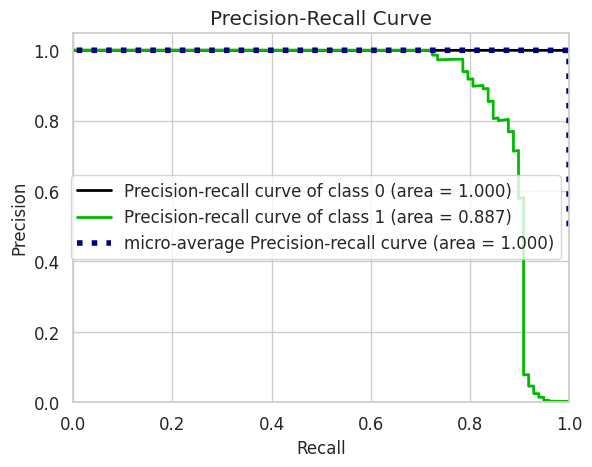

In [ ]:
y_pred_proba = pipe_model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm.

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map.

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

***ii. Define Model***

***iii. Compile Model***

***iv. Fit Model***

***v. Prediction and Model Evaluating***

***vi. Plot Precision and Recall Curve***

***v. Apply Model Evaluation Checks***
* link : https://docs.deepchecks.com/stable/user-guide/tabular/auto_quickstarts/plot_quick_model_evaluation.html

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Streamlit API.

### Save and Export the Best Model


### Save and Export Variables

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___